<a href="https://colab.research.google.com/github/setyo-dwi-pratama/data-analyst/blob/master/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NETFLIX**

Dataset yang digunakan adalah dataset netflix. 

Netflix adalah salah satu penyedia layanan media streaming digital yang berkantor pusat di california, Amerika Serikat. Bisnis utama dari perusahan ini adalah layanan berlangganan streaming yang mana ditawarkan secara online dengan beberapa program film dan acara televisi, termasuk beberapa program yang dibuat oleh netflix sendiri.

# Packages yang dibutuhkan:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Input data Netflix dari github:

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/setyo-dwi-pratama/data-analyst/master/netflix_titles.csv')

In [4]:
df.head() #menampilkan 5 data teratas dari sebuah dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
df.tail() #melihat 5 dataset terbawah dari sebuah dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6233,70153404,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


# Mengatasi Missing Value dari sebuah dataset:

In [7]:
df.isnull().sum() #Melihat jumlah missing value dari setiap kolom dataset

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

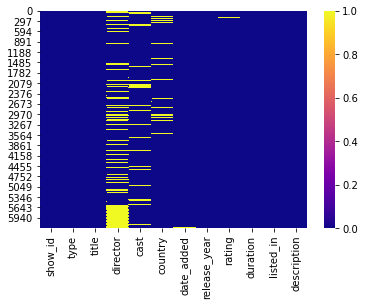

In [8]:
sns.heatmap(df.isnull(), cmap="plasma") #Melihat jumlah missing value dari setiap kolom dataset menggunakan visualisasi packages seaborn

Berdasarkan Kasus pada dataset ini, kita akan mengahapus beberapa kolom yaitu kolom director (Produser), cast (artis/pemeran), dan date_added (waktu pembuatan). Alasan menghapus, karena tidak ada pengaruh khusus pada analisis yang sekarang

In [9]:
#hapus data pada axis=1 (kolom), yang nama kolomnya yaitu director, cast, date_added dan kembalikan ke dataset awal (inplace=True)
df.drop(['director','cast','date_added'], axis=1, inplace=True)

Berdasarkan Kasus pada dataset ini, pada kolom country terdapat mising value sebanyak 476.

Kita akan mengisi missing value pada kolom country dengan United States, Alasan menghapus, karena netflix merupakan kantor yang berpusat di country United States

In [10]:
#ganti data pada kolom country yang terdapat missing value dengan 'United States' dan kembalikan ke dataset awal (inplace=True)
df['country'].replace(np.nan, 'United States', inplace=True)

Berdasarkan Kasus pada dataset ini, pada kolom rating terdapat missing value sebanyak 10.

Kita akan mengisi missing value pada kolom rating dengan TV-MA. Alasan menghapus, karena berdasarkan data rating pada 'TV-MA' sangat tinggi

perhatikan banyaknya (TV-MA) sebelum dan sesudah diisi missing value dengan 'TV-MA

In [19]:
# melihat banyaknya rating sebelum diganti missing value nya dengan 'TV-MA' 
df.rating.value_counts()

TV-MA       2037
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [20]:
# mengisi semua missing value dalam kolom rating dengan data 'TV-MA'
df['rating'].replace(np.nan, 'TV-MA', inplace=True)

In [21]:
# melihat banyaknya rating sesudah diganti missing value nya dengan 'TV-MA'
df.rating.value_counts()

TV-MA       2037
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

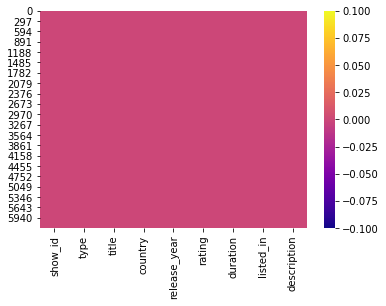

In [22]:
# selesai menghandle missing value, lihat kembali dataset yang kita miliki dengan menggunakan visualisasi packages seaborn
sns.heatmap(df.isnull(), cmap="plasma")

# Analisis dan Visualisasi Data:

## Melihat banyaknya data berdasarkan kolom type:

In [23]:
# melihat banyak nya data berdasarkan kolom type
df['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

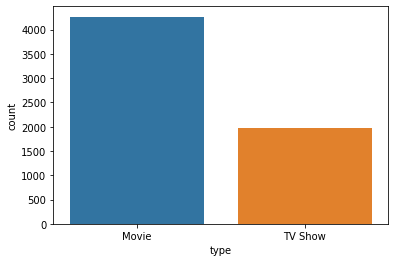

In [24]:
# visualisasi dengan seaborn
sns.countplot(x='type', data=df)

Berdasarkan kolom type, ternyata kita mempunyai data yang terdominasi dengan movie (film) dibandingan TV Show (Acara TV)

## Melihat banyaknya data berdasarkan kolom rating:

In [25]:
# melihat banyak nya data berdasarkan kolom rating
df.rating.value_counts()

TV-MA       2037
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

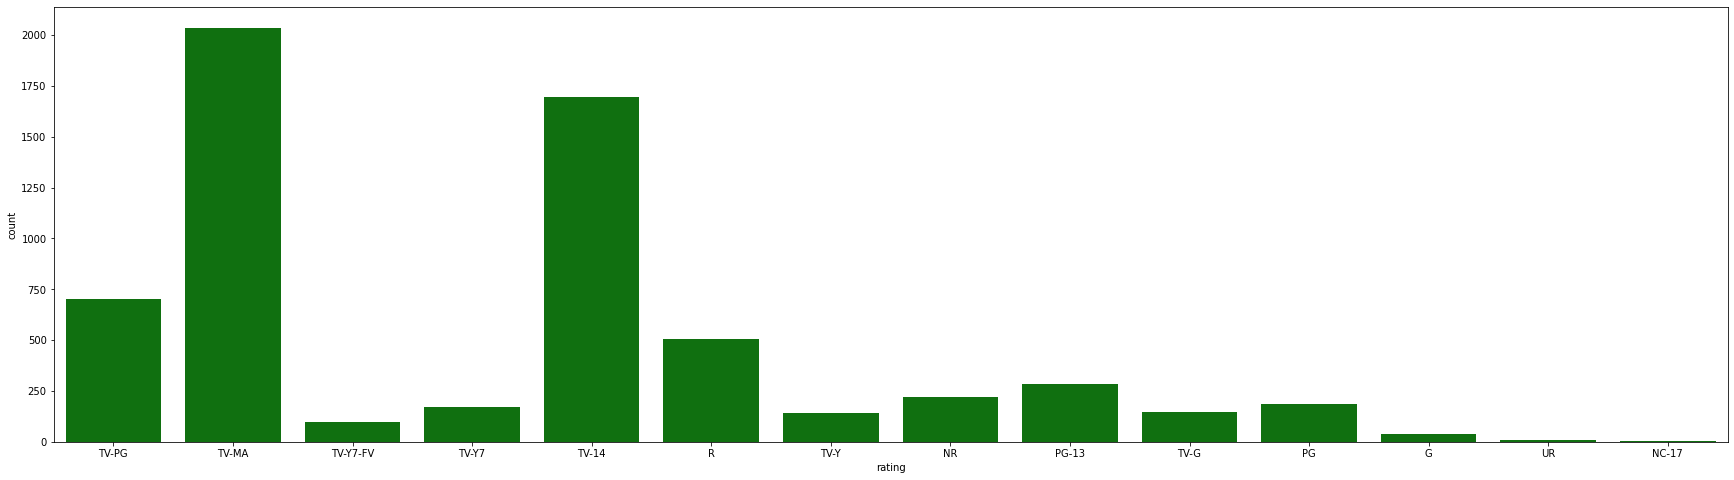

In [26]:
# visualisasi dengan seaborn
plt.figure(figsize=(30,8)) #memperbesar ukuran figure(panjang,lebar)
sns.countplot(x='rating', data=df, color="green")

Berdasarkan kolom rating:

TV-MA mempunyai rating tertinggi

NC-17 mempunyai rating terendah

## Melihat banyaknya data berdasarkan tahun realese dari semua type:

In [27]:
#melihat banyaknya data berdasarkan tahun realese
df.release_year.value_counts()

2018    1063
2017     959
2019     843
2016     830
2015     517
        ... 
1959       1
1963       1
1964       1
1956       1
1925       1
Name: release_year, Length: 72, dtype: int64

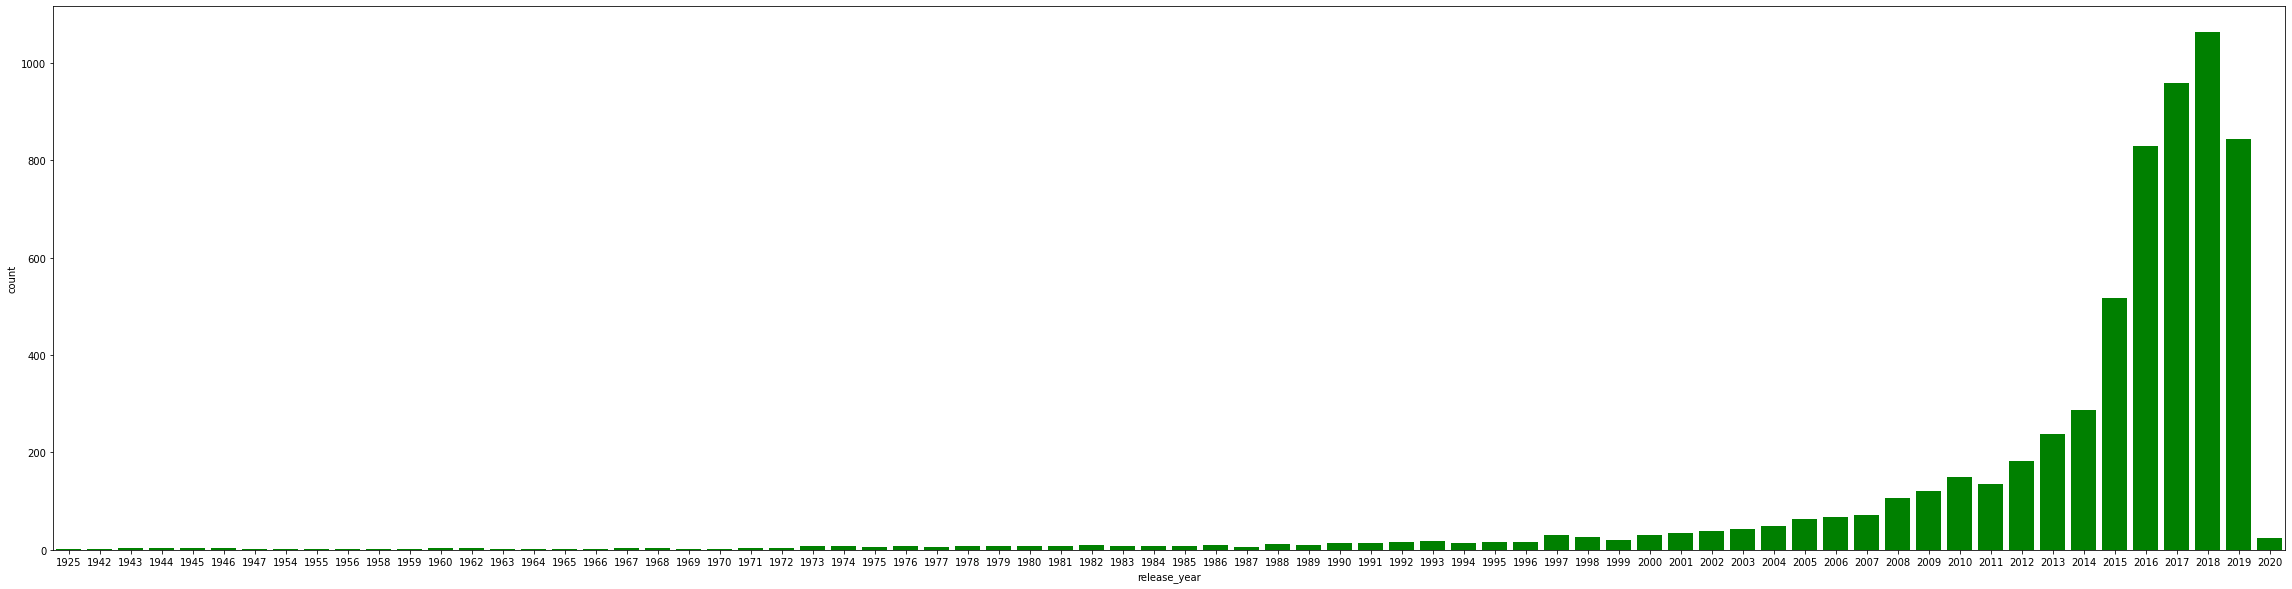

In [28]:
# Visualisasi dengan seaborn
plt.figure(figsize=(40,10)) #memperbesar figur(panjang,lebar)
sns.countplot(x='release_year', data=df, saturation=1, color="green")

Berdasarkan tahun realesenya, ditahun 2018 merupakan tahun realese terbanyak dari netflix, tapi kita belum mengetahui secara pasti ditahun tersebut type apa yang banyak diantara movie dan TV-Show

## Melihat rating berdasarkan typenya:

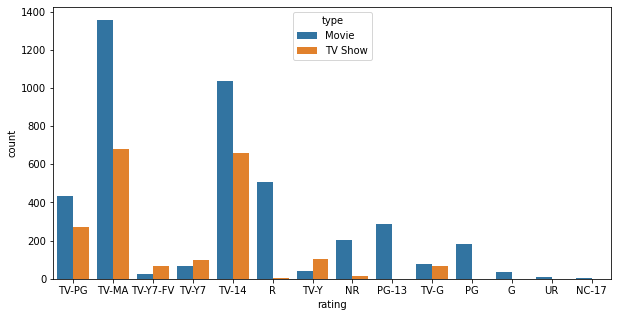

In [30]:
# Visualisasi seaborn
plt.figure(figsize=(10,5)) #memperbersar figure(panjang,lebar)
sns.countplot(x='rating', data=df, hue='type')

berdasrkan visualisai, kita dapat melihat bahwa rating TV-MA pada movie mempunyai rating yang tinggi dibandingkan TV-Show. Sedangkan pada TV-Y7 sebaliknya dengan TV-MA, yaitu TV-Show mempunyai rating tinggi dibandingkan dengan movie 

## Melihat 10 Movie/TV Show Tertua dari sebuah dataset netflix:

In [31]:
# membuat variabel dengan nama tahun_tua
# dari dataset yang dimiliki, akan di urutkan berdasarkan kolom release_year dan mereset index nya kembali
tahun_tua = df.sort_values("release_year", ascending=True, ignore_index=True)

In [32]:
tahun_tua

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,81030762,TV Show,Pioneers: First Women Filmmakers*,United States,1925,TV-PG,1 Season,TV Shows,This collection restores films from women who ...
1,60027945,Movie,Prelude to War,United States,1942,TV-PG,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
2,60027942,Movie,The Battle of Midway,United States,1942,TV-G,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
3,80119186,Movie,Undercover: How to Operate Behind Enemy Lines,United States,1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
4,70013050,Movie,Why We Fight: The Battle of Russia,United States,1943,TV-14,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
...,...,...,...,...,...,...,...,...,...
6229,81039393,TV Show,Cheer,United States,2020,TV-MA,1 Season,"Docuseries, Reality TV, Teen TV Shows",This gripping docuseries follows the ups and d...
6230,81214114,Movie,Bulletproof 2,United States,2020,TV-MA,97 min,"Action & Adventure, Comedies",A special agent abruptly reunites with a crimi...
6231,81034946,TV Show,Maradona in Mexico,"Argentina, United States, Mexico",2020,TV-MA,1 Season,"Docuseries, Spanish-Language TV Shows","In this docuseries, soccer great Diego Maradon..."
6232,81062828,TV Show,Killer Inside: The Mind of Aaron Hernandez,United States,2020,TV-MA,1 Season,"Crime TV Shows, Docuseries","Via interviews with friends, players and insid..."


In [33]:
#melihat 10 data tertua
tahun_tua[['title','type','release_year']][:10]

,title,type,release_year
0,Pioneers: First Women Filmmakers*,TV Show,1925
1,Prelude to War,Movie,1942
2,The Battle of Midway,Movie,1942
3,Undercover: How to Operate Behind Enemy Lines,Movie,1943
4,Why We Fight: The Battle of Russia,Movie,1943
5,WWII: Report from the Aleutians,Movie,1943
6,The Memphis Belle: A Story of a\nFlying Fortress,Movie,1944
7,The Negro Soldier,Movie,1944
8,Tunisian Victory,Movie,1944
9,San Pietro,Movie,1945


## Melihat 10 Movie/TV Show Terbaru dari sebuah dataset netflix:

In [34]:
# membuat variabel dengan nama tahun_baru
# dari dataset yang dimiliki, akan di urutkan berdasarkan kolom release_year dan mereset index nya kembali
tahun_baru = df.sort_values("release_year", ascending=False, ignore_index=True)

In [35]:
tahun_baru

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,81011449,TV Show,Medical Police,United States,2020,TV-MA,1 Season,"Crime TV Shows, TV Action & Adventure, TV Come...",Doctors Owen Maestro and Lola Spratt leave Chi...
1,81006825,Movie,All the Freckles in the World,Mexico,2020,TV-14,90 min,"Comedies, International Movies, Romantic Movies",Thirteen-year-old José Miguel is immune to 199...
2,80997687,TV Show,Dracula,United Kingdom,2020,TV-14,1 Season,"British TV Shows, International TV Shows, TV D...",The Count Dracula legend transforms with new t...
3,81060049,Movie,Leslie Jones: Time Machine,United States,2020,TV-MA,66 min,Stand-Up Comedy,From trying to seduce Prince to battling sleep...
4,80239306,TV Show,The Healing Powers of Dude,United States,2020,TV-G,1 Season,"Kids' TV, TV Comedies, TV Dramas",When an 11-year-old boy with social anxiety di...
...,...,...,...,...,...,...,...,...,...
6229,70013050,Movie,Why We Fight: The Battle of Russia,United States,1943,TV-14,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
6230,80119186,Movie,Undercover: How to Operate Behind Enemy Lines,United States,1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
6231,60027942,Movie,The Battle of Midway,United States,1942,TV-G,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
6232,60027945,Movie,Prelude to War,United States,1942,TV-PG,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...


In [36]:
# melihat 10 data terbaru
tahun_baru[['title','type','release_year']][:15]

,title,type,release_year
0,Medical Police,TV Show,2020
1,All the Freckles in the World,Movie,2020
2,Dracula,TV Show,2020
3,Leslie Jones: Time Machine,Movie,2020
4,The Healing Powers of Dude,TV Show,2020
5,"Live Twice, Love Once",Movie,2020
6,Cheer,TV Show,2020
7,AJ and the Queen,TV Show,2020
8,Bulletproof 2,Movie,2020
9,Jamtara - Sabka Number Ayega,TV Show,2020


### Melihat banyaknya Movie dan TV-Show Berdasarkan tahun releasenya:

In [64]:
# melihat 10 data berdasarkan tahun releasenya yang bertype movie
tahun_movie = df[df["type"]=="Movie"]["release_year"].value_counts()[:10]

In [65]:
tahun_movie

2017    682
2018    646
2016    593
2019    400
2015    363
2014    213
2013    177
2012    125
2010    111
2011    100
Name: release_year, dtype: int64

Text(0.5, 1.0, '10 Film yang tersedia dari netflix berdasarkan tahun release')

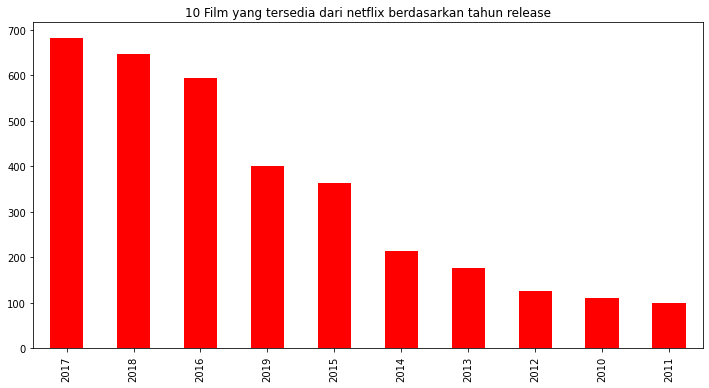

In [67]:
plt.figure(figsize=(12,6))
tahun_movie.plot(kind="bar",color="Red")
plt.title("10 Film yang tersedia dari netflix berdasarkan tahun release")

In [72]:
# melihat 10 data berdasarkan tahun releasenya yang bertype TV-Show
tahun_tvshow = df[df["type"]=="TV Show"]["release_year"].value_counts()[:10]

In [73]:
tahun_tvshow

2019    443
2018    417
2017    277
2016    237
2015    154
2014     75
2013     60
2012     58
2010     38
2011     36
Name: release_year, dtype: int64

Text(0.5, 1.0, '10 TV Show yang tersedia dari netflix berdasarkan tahun release')

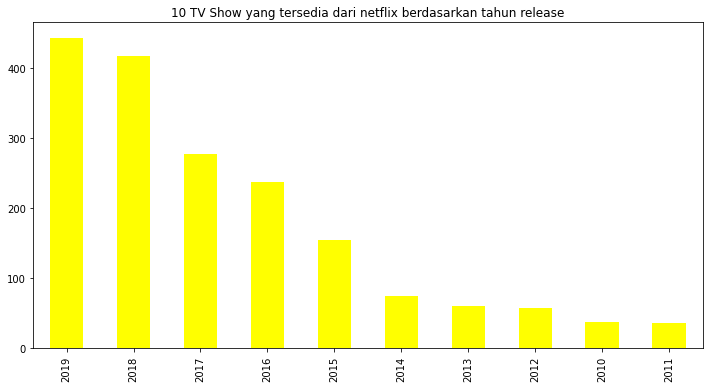

In [75]:
plt.figure(figsize=(12,6))
tahun_tvshow.plot(kind="bar",color="yellow")
plt.title("10 TV Show yang tersedia dari netflix berdasarkan tahun release")

## Melihat banyaknya Movie dan TV-Show Berdasarkan genre atau kolom listed_in:

In [80]:
# melihat 10 data berdasarkan genre atau kolom listed_id yang bertype movie
genre_movie = df[df["type"]=="Movie"]["listed_in"].value_counts()[:10]

In [81]:
genre_movie

Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
Documentaries, International Movies                 150
Children & Family Movies, Comedies                  129
Children & Family Movies                            120
Comedies, International Movies                      120
Dramas, International Movies, Romantic Movies       108
Name: listed_in, dtype: int64

Text(0.5, 1.0, '10 Top Data berdasarkan Genre bertipe Movie')

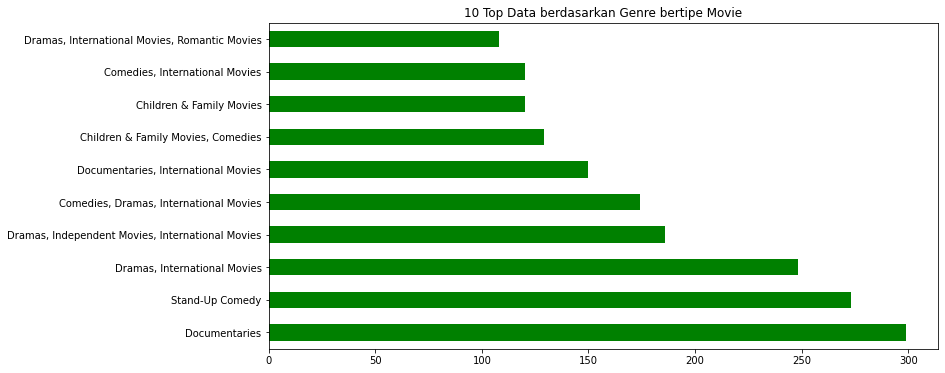

In [87]:
plt.figure(figsize=(12,6))
genre_movie.plot(kind="barh",color="green")
plt.title("10 Top Data berdasarkan Genre bertipe Movie")

In [88]:
# melihat 10 data berdasarkan genre atau kolom listed_id yang bertype tv show
genre_tvshow = df[df["type"]=="TV Show"]["listed_in"].value_counts()[:10]

In [89]:
genre_tvshow

Kids' TV                                                      159
Crime TV Shows, International TV Shows, TV Dramas              92
International TV Shows, TV Dramas                              92
International TV Shows, Romantic TV Shows, TV Dramas           78
Kids' TV, TV Comedies                                          75
International TV Shows, Romantic TV Shows, TV Comedies         66
Docuseries                                                     65
Anime Series, International TV Shows                           62
International TV Shows, Korean TV Shows, Romantic TV Shows     56
TV Comedies                                                    52
Name: listed_in, dtype: int64

Text(0.5, 1.0, '10 Top Data berdasarkan Genre bertipe TV-Show')

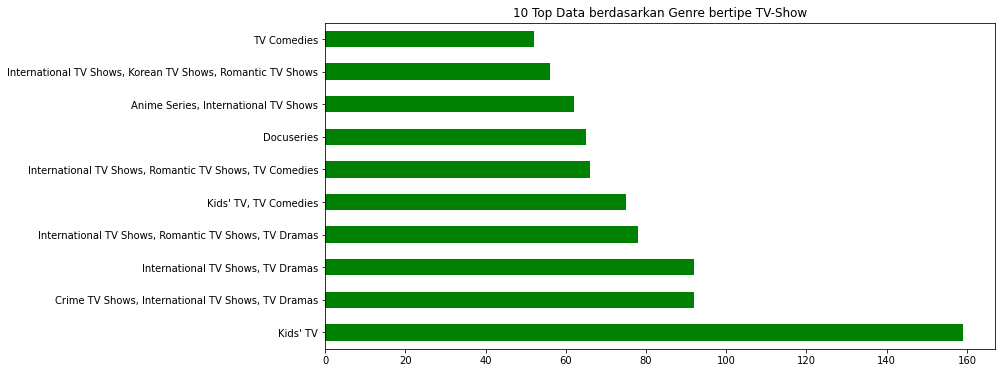

In [90]:
plt.figure(figsize=(12,6))
genre_tvshow.plot(kind="barh",color="green")
plt.title("10 Top Data berdasarkan Genre bertipe TV-Show")